In [123]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

Importowanie zbioru testowego

In [124]:
raw_df=pd.read_csv("orig_train.csv")
raw_df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


Sprawdzamy długość ramki danych


In [125]:
len(raw_df)

15097

In [126]:
raw_df.columns

Index(['PRODUCT', 'AGE', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION',
       'MARITAL_STATUS', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
       'WORK_SENIORITY', 'BUSINESS AGE', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO',
       'LENGTH_RELATIONSHIP_WITH_CLIENT', 'DEBIT_CARD', 'CURRENT_ACCOUNT',
       'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'FINALIZED_LOAN',
       'DEPOSIT', 'PENSION_FUNDS', 'DEFAULT_FLAG'],
      dtype='object')

In [127]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [128]:
raw_df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Opisy komórek ciągłych### 
- age - wiek osoby
- household_members - liczba osób w gospodarstwie domowym
- no_of_dependents - liczba osób zależnych finansowo od tej konkretnej osoby
- income - dochód miesięczny
- work_seniority - staż pracy/ doświadczenie zawodowe w danej branży
- business age - wiek firmy ???? do sprawdzenia
- lenghth_relationship_with_client - długość relacji z klientem
- debit_card - posiadanie karty debetowej
- current_account - posiadanie rachunku bieżącego przez klienta
- saving_account - posiadanie rachunku oszczędnościowego przez klienta
- salary_account - posiadanie konta przeznaczonego do otrzymywania wynagrodzeń klienta
- foreign_account - posiadanie konta zagranicznego/ rachunku walutowego przez klienta
- finalized_loan - czy proces udzielania kredytu został zakończony?
- deposit - do sprawdzenia
- pension_funds - fundusze emerytalne, pusta kolumna de facto, więc do wywalenia
- default_flag - być może fakt czy klient zalega ze spłatą lub nie?

### Opisy komórek tekstowych ###
- product - prawdopodobnie typ kredytu/ usługi
- area - obszar zamieszkiwania klienta
- residential_place - miejsce zamieszkiwania - owner without mortgage - właściciel mieszkania bez kredytu, - owner with mortgage - właściciel z kredytem, rental - najemca, living with family - mieszkanie z rodziną, other - inne
- education - najwyższy zdobyty poziom edukacji
- martial status - status matrymonialny - singiel, wdowa, w małżeństwie, rozwiedziony
- economic sector - branża działalności gospodarczej
- employee_no - liczba pracowników

In [129]:
raw_df["PRODUCT"].unique()

array(['C', 'F', 'B', 'E', 'D', 'A'], dtype=object)

In [130]:
raw_df["AREA"].unique()

array(['County capital', 'Urban area', 'Rural area', 'Missing'],
      dtype=object)

In [131]:
raw_df["RESIDENTIAL_PLACE"].unique()

array(['Owner without mortgage', 'Living with family',
       'Owner with mortgage', 'Rental', 'Other'], dtype=object)

In [132]:
raw_df["EDUCATION"].unique()

array(['University', 'Post-graduate', 'Highschool', 'Missing',
       'Post secondary school', 'Other', 'College', 'Vocational school',
       'Middle school', 'Primary school'], dtype=object)

In [133]:
raw_df["MARITAL_STATUS"].unique()

array(['married', 'divorced', 'single', 'widow'], dtype=object)

In [134]:
raw_df["ECONOMIC_SECTOR"].unique()

array(['Missing', 'Other', 'Education', 'Manufacturing',
       'Public administration and defence', 'Wholesale and retail trade',
       'Human health and social work activities',
       'Professional, scientific and technical activities',
       'Electricity and gas', 'Transportation and storage',
       'Construction', 'Water supply', 'Mining and quarrying',
       'Information and communication',
       'Agriculture, hunting and forestry',
       'Financial and insurance activities',
       'Accommodation and food service activities',
       'Real estate activities'], dtype=object)

In [135]:
raw_df['EMPLOYEE_NO'].unique()

array(['Missing', '> 1.000', 'between 11-20', 'between 101-250',
       'between 0-10', 'between 51-100', 'between 21-50',
       'between 501-1.000', 'between 251-500'], dtype=object)

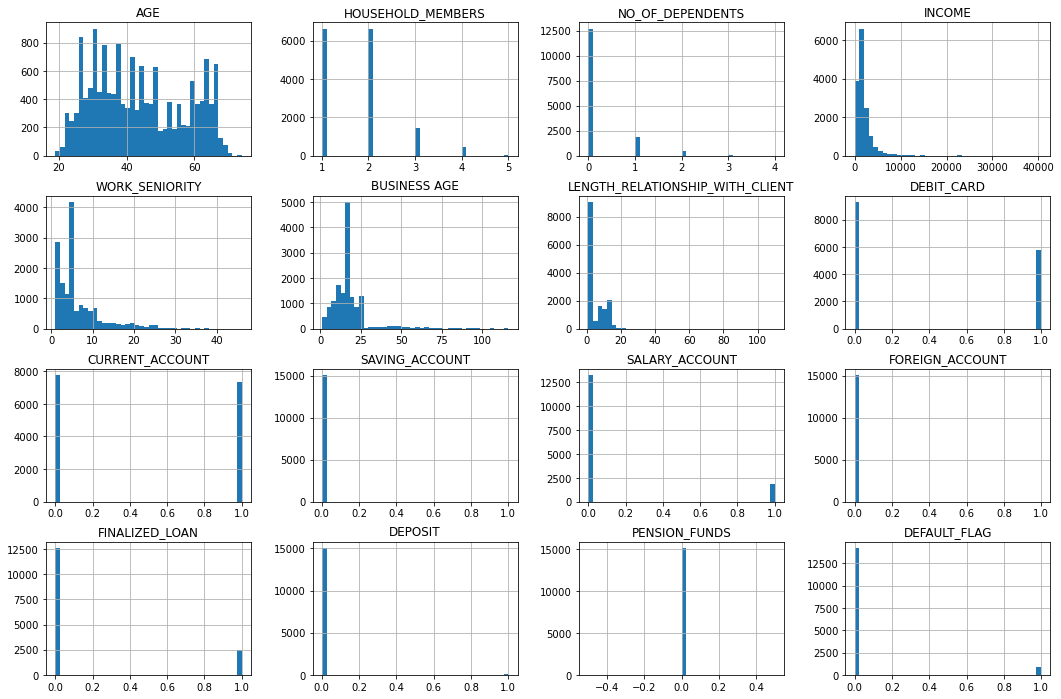

In [136]:
raw_df.hist(bins=40,figsize=(18,12))
plt.show()

In [137]:
df_without_pension_funds=raw_df.drop(columns="PENSION_FUNDS")
df_without_pension_funds.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,EMPLOYEE_NO,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,Missing,1,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,Missing,8,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,> 1.000,1,1,1,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,between 11-20,2,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,Missing,1,1,1,0,0,0,0,0,0


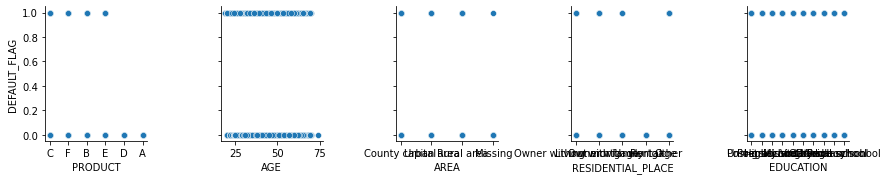

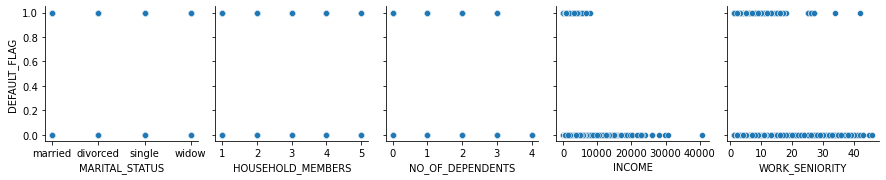

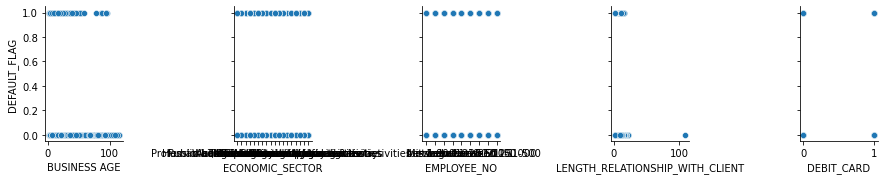

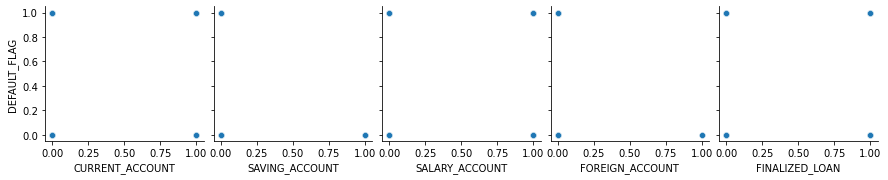

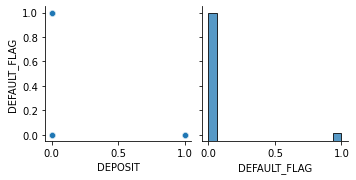

In [138]:
sns.pairplot(df_without_pension_funds,y_vars="DEFAULT_FLAG",x_vars=df_without_pension_funds.columns.values[:5])
sns.pairplot(df_without_pension_funds,y_vars="DEFAULT_FLAG",x_vars=df_without_pension_funds.columns.values[5:10])
sns.pairplot(df_without_pension_funds,y_vars="DEFAULT_FLAG",x_vars=df_without_pension_funds.columns.values[10:15])
sns.pairplot(df_without_pension_funds,y_vars="DEFAULT_FLAG",x_vars=df_without_pension_funds.columns.values[15:20])
sns.pairplot(df_without_pension_funds,y_vars="DEFAULT_FLAG",x_vars=df_without_pension_funds.columns.values[20:22])

In [139]:
df_without_pension_funds.groupby(["PRODUCT","DEFAULT_FLAG"]).agg("size").reset_index(name="count")
# widzimy, że produkt D występuje tylko 13 razy - można spróbować wywalić te wiersze
df_without_pension_funds=df_without_pension_funds[df_without_pension_funds['PRODUCT']!="D"]
df_without_pension_funds

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,EMPLOYEE_NO,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,Missing,1,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,Missing,8,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,> 1.000,1,1,1,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,between 11-20,2,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,Missing,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,F,31,County capital,Living with family,Post-graduate,married,2,0,1886.0,8,...,> 1.000,1,1,1,0,0,0,0,0,0
15093,C,54,Rural area,Living with family,Highschool,single,1,0,670.0,36,...,between 101-250,9,0,0,0,0,0,1,0,0
15094,C,45,County capital,Owner without mortgage,University,single,1,0,4794.0,11,...,> 1.000,11,0,0,0,0,0,0,0,0
15095,C,57,County capital,Owner without mortgage,University,married,2,0,3733.6,11,...,between 251-500,1,1,1,0,0,0,0,0,0


In [140]:
df_without_pension_funds.groupby(["AREA","DEFAULT_FLAG"]).size().reset_index()

,AREA,DEFAULT_FLAG,0
0,County capital,0,7241
1,County capital,1,333
2,Missing,0,32
3,Missing,1,1
4,Rural area,0,3860
5,Rural area,1,331
6,Urban area,0,3087
7,Urban area,1,199


<AxesSubplot:xlabel='AGE', ylabel='INCOME'>

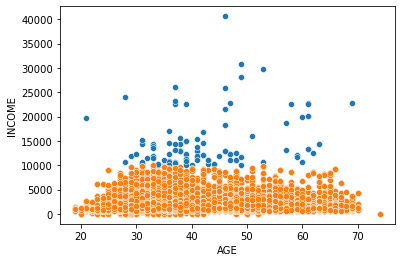

In [141]:
sns.scatterplot(x=df_without_pension_funds['AGE'],y=df_without_pension_funds['INCOME'])
filtered_price=df_without_pension_funds[df_without_pension_funds["INCOME"]<10000]
sns.scatterplot(x=filtered_price['AGE'],y=filtered_price['INCOME'])

<AxesSubplot:xlabel='AGE', ylabel='INCOME'>

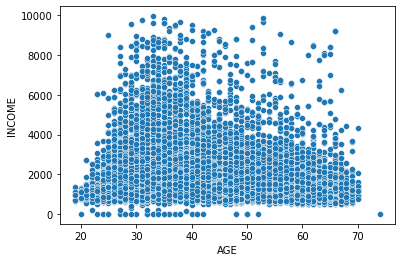

In [142]:
sns.scatterplot(x=filtered_price['AGE'],y=filtered_price['INCOME'])

<AxesSubplot:xlabel='WORK_SENIORITY', ylabel='INCOME'>

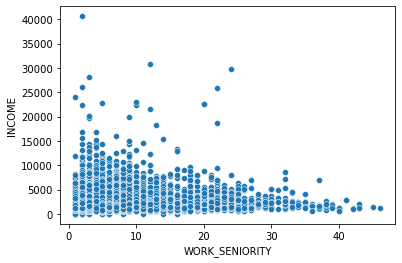

In [143]:
sns.scatterplot(x=df_without_pension_funds['WORK_SENIORITY'],y=df_without_pension_funds['INCOME'])


<AxesSubplot:xlabel='WORK_SENIORITY', ylabel='INCOME'>

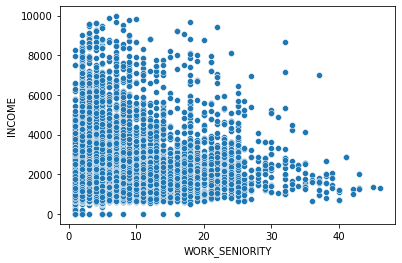

In [144]:
sns.scatterplot(x=filtered_price['WORK_SENIORITY'],y=filtered_price['INCOME'])


In [145]:
df_without_pension_funds.groupby(["AREA","DEFAULT_FLAG"]).size().reset_index()

,AREA,DEFAULT_FLAG,0
0,County capital,0,7241
1,County capital,1,333
2,Missing,0,32
3,Missing,1,1
4,Rural area,0,3860
5,Rural area,1,331
6,Urban area,0,3087
7,Urban area,1,199


In [146]:
df_without_pension_funds.groupby(["RESIDENTIAL_PLACE","DEFAULT_FLAG"]).size().reset_index()

,RESIDENTIAL_PLACE,DEFAULT_FLAG,0
0,Living with family,0,4987
1,Living with family,1,517
2,Other,0,221
3,Other,1,25
4,Owner with mortgage,0,850
5,Owner with mortgage,1,2
6,Owner without mortgage,0,8134
7,Owner without mortgage,1,320
8,Rental,0,28


In [147]:
df_without_pension_funds.groupby(["EDUCATION","DEFAULT_FLAG"]).size().reset_index()

,EDUCATION,DEFAULT_FLAG,0
0,College,0,503
1,College,1,59
2,Highschool,0,3288
3,Highschool,1,162
4,Middle school,0,170
5,Middle school,1,25
6,Missing,0,664
7,Missing,1,27
8,Other,0,705
9,Other,1,114


In [148]:
df_without_pension_funds.groupby(["MARITAL_STATUS","DEFAULT_FLAG"]).size().reset_index()

,MARITAL_STATUS,DEFAULT_FLAG,0
0,divorced,0,988
1,divorced,1,54
2,married,0,7905
3,married,1,227
4,single,0,4559
5,single,1,553
6,widow,0,768
7,widow,1,30


In [149]:
df_without_pension_funds.groupby(["HOUSEHOLD_MEMBERS","DEFAULT_FLAG"]).size().reset_index()

,HOUSEHOLD_MEMBERS,DEFAULT_FLAG,0
0,1,0,6027
1,1,1,583
2,2,0,6373
3,2,1,227
4,3,0,1386
5,3,1,40
6,4,0,419
7,4,1,11
8,5,0,15
9,5,1,3


In [150]:
df_without_pension_funds.groupby(["NO_OF_DEPENDENTS","DEFAULT_FLAG"]).size().reset_index()

,NO_OF_DEPENDENTS,DEFAULT_FLAG,0
0,0,0,11952
1,0,1,710
2,1,0,1750
3,1,1,127
4,2,0,487
5,2,1,22
6,3,0,27
7,3,1,5
8,4,0,4


In [151]:
df_without_pension_funds.groupby(["INCOME","DEFAULT_FLAG"]).size().reset_index()

,INCOME,DEFAULT_FLAG,0
0,0.00,0,32
1,0.00,1,9
2,143.33,0,1
3,174.66,0,1
4,187.00,0,1
...,...,...,...
8246,26028.75,0,1
8247,28147.56,0,1
8248,29725.00,0,1
8249,30746.00,0,1


In [152]:
df_without_pension_funds=df_without_pension_funds[~((df_without_pension_funds["INCOME"]==0) & (df_without_pension_funds["DEFAULT_FLAG"]==1))]

In [170]:
df_without_pension_funds=df_without_pension_funds[df_without_pension_funds["INCOME"]<=25000]

In [171]:
df_without_pension_funds.groupby(["WORK_SENIORITY","DEFAULT_FLAG"]).size().reset_index()

,WORK_SENIORITY,DEFAULT_FLAG,0
0,1,0,544
1,1,1,74
2,2,0,1933
3,2,1,293
4,3,0,1393
...,...,...,...
63,42,0,1
64,42,1,1
65,43,0,3
66,45,0,1


In [172]:
df_without_pension_funds.groupby(["BUSINESS AGE","DEFAULT_FLAG"]).size().reset_index().tail(10)     

,BUSINESS AGE,DEFAULT_FLAG,0
143,104,0,2
144,105,0,4
145,106,0,8
146,107,0,5
147,109,0,3
148,111,0,1
149,112,0,4
150,114,0,2
151,115,0,3
152,116,0,6


In [173]:
df_without_pension_funds.groupby(["ECONOMIC_SECTOR","DEFAULT_FLAG"]).size().reset_index()

,ECONOMIC_SECTOR,DEFAULT_FLAG,0
0,Accommodation and food service activities,0,138
1,Accommodation and food service activities,1,21
2,"Agriculture, hunting and forestry",0,177
3,"Agriculture, hunting and forestry",1,19
4,Construction,0,330
5,Construction,1,28
6,Education,0,453
7,Education,1,6
8,Electricity and gas,0,150
9,Electricity and gas,1,2


In [174]:
df_without_pension_funds.groupby(["EMPLOYEE_NO","DEFAULT_FLAG"]).size().reset_index()

,EMPLOYEE_NO,DEFAULT_FLAG,0
0,> 1.000,0,2999
1,> 1.000,1,238
2,Missing,0,3229
3,Missing,1,107
4,between 0-10,0,672
5,between 0-10,1,8
6,between 101-250,0,1531
7,between 101-250,1,112
8,between 11-20,0,361
9,between 11-20,1,11


In [158]:
df_without_pension_funds.groupby(["LENGTH_RELATIONSHIP_WITH_CLIENT","DEFAULT_FLAG"]).size().reset_index()

,LENGTH_RELATIONSHIP_WITH_CLIENT,DEFAULT_FLAG,0
0,1,0,5456
1,1,1,464
2,2,0,2770
3,2,1,203
4,3,0,129
5,3,1,8
6,4,0,172
7,4,1,9
8,5,0,153
9,5,1,12


In [179]:
df_without_pension_funds=df_without_pension_funds[df_without_pension_funds['LENGTH_RELATIONSHIP_WITH_CLIENT']!=110]

In [180]:
df_without_pension_funds.groupby(["DEBIT_CARD","DEFAULT_FLAG"]).size().reset_index()

,DEBIT_CARD,DEFAULT_FLAG,0
0,0,0,8716
1,0,1,569
2,1,0,5497
3,1,1,286


In [181]:
df_without_pension_funds.groupby(["CURRENT_ACCOUNT","DEFAULT_FLAG"]).size().reset_index()

,CURRENT_ACCOUNT,DEFAULT_FLAG,0
0,0,0,7260
1,0,1,499
2,1,0,6953
3,1,1,356


In [182]:
df_without_pension_funds.groupby(["SAVING_ACCOUNT","DEFAULT_FLAG"]).size().reset_index()

KeyError: 'SAVING_ACCOUNT'

In [183]:
df_without_pension_funds.groupby(["SALARY_ACCOUNT","DEFAULT_FLAG"]).size().reset_index()

,SALARY_ACCOUNT,DEFAULT_FLAG,0
0,0,0,12493
1,0,1,719
2,1,0,1720
3,1,1,136


In [184]:
df_without_pension_funds.groupby(["FOREIGN_ACCOUNT","DEFAULT_FLAG"]).size().reset_index()

KeyError: 'FOREIGN_ACCOUNT'

In [185]:
df_without_pension_funds.groupby(["FINALIZED_LOAN","DEFAULT_FLAG"]).size().reset_index()

,FINALIZED_LOAN,DEFAULT_FLAG,0
0,0,0,11788
1,0,1,807
2,1,0,2425
3,1,1,48


In [186]:
df_without_pension_funds.groupby(["DEPOSIT","DEFAULT_FLAG"]).size().reset_index()

KeyError: 'DEPOSIT'

In [187]:
df_without_pension_funds=df_without_pension_funds.drop(columns=["FOREIGN_ACCOUNT","SAVING_ACCOUNT","DEPOSIT"])

KeyError: "['FOREIGN_ACCOUNT', 'SAVING_ACCOUNT', 'DEPOSIT'] not found in axis"

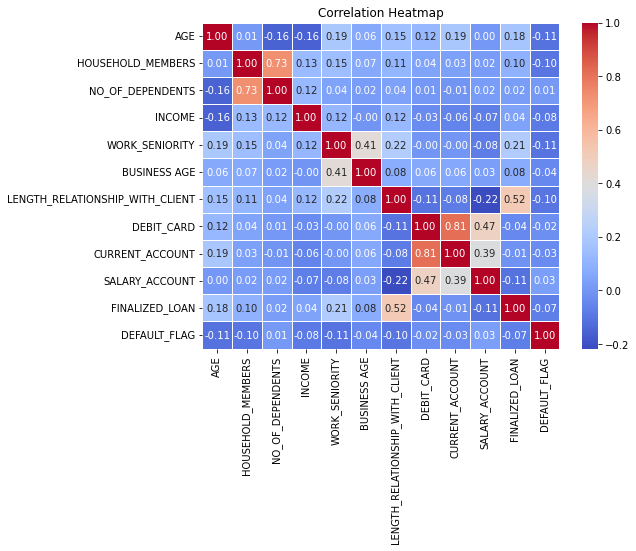

In [188]:
correlation_matrix = df_without_pension_funds.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [227]:
df_without_pension_funds=df_without_pension_funds.drop(columns=['DEBIT_CARD','HOUSEHOLD_MEMBERS'])

In [190]:
df_without_pension_funds.to_csv('output.csv',index=False)

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

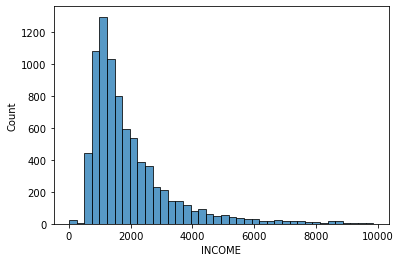

In [231]:
#sns.scatterplot(x=df_without_pension_funds['MARITAL_STATUS'],y=df_without_pension_funds['INCOME'])
df_without_pension_funds.groupby(["MARITAL_STATUS"]).agg('median')["INCOME"]
df_married=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='married') & (df_without_pension_funds['INCOME']<10000)]
df_single=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='single') & (df_without_pension_funds['INCOME']<10000)]
df_divorced=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='divorced') & (df_without_pension_funds['INCOME']<10000)]
df_widow=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='widow') & (df_without_pension_funds['INCOME']<10000)]

df_married_2=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='married')]
df_single_2=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='single') ]
df_divorced_2=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='divorced')]
df_widow_2=df_without_pension_funds[(df_without_pension_funds['MARITAL_STATUS']=='widow')]

sns.histplot(x=df_married['INCOME'],bins=40)


<AxesSubplot:xlabel='INCOME', ylabel='Count'>

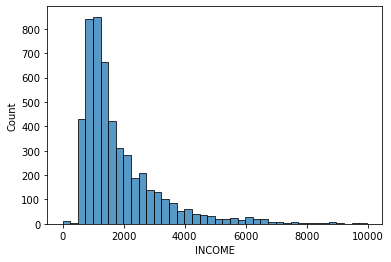

In [214]:
sns.histplot(x=df_single['INCOME'],bins=40)

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

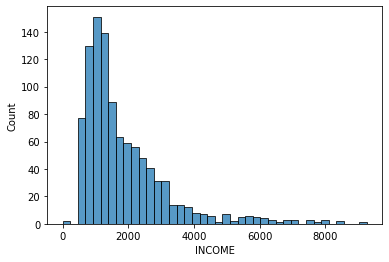

In [215]:
sns.histplot(x=df_divorced['INCOME'],bins=40)

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

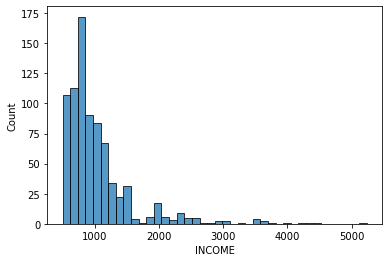

In [218]:
sns.histplot(x=df_widow['INCOME'],bins=40)

In [228]:
df_married_2.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
count,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000
mean,45.289989,2.264253,0.296269,2048.149625,7.507819,18.827977,5.550055,0.407832,0.506834,0.127817,0.207733,0.027337
std,12.084962,0.580779,0.584611,1715.398432,6.267711,13.403664,5.027950,0.491462,0.499984,0.333906,0.405710,0.163072
min,20.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,0.000000,1070.637500,4.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,2.000000,0.000000,1528.000000,5.000000,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,56.000000,2.000000,0.000000,2396.000000,9.000000,22.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,74.000000,5.000000,4.000000,22827.660000,43.000000,116.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
df_single_2.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
count,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,37.152702,1.047181,0.065192,1902.869816,5.239233,16.551096,3.972200,0.332224,0.421496,0.112177,0.084377,0.107478
std,13.040649,0.242220,0.276801,1574.018418,4.390112,11.169464,4.170632,0.471057,0.493847,0.315615,0.277980,0.309751
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,994.337500,2.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,0.000000,1401.500000,4.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,1.000000,0.000000,2262.025000,6.000000,20.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,70.000000,4.000000,3.000000,23114.405000,46.000000,116.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
df_divorced_2.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,48.292988,1.246878,0.229587,2023.006865,7.250720,18.202690,5.682037,0.404419,0.512008,0.133525,0.176753,0.051873
std,11.327198,0.518460,0.500124,1931.919800,5.562197,12.808134,5.179634,0.491015,0.500096,0.340305,0.381643,0.221878
min,26.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,0.000000,1007.000000,4.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,1.000000,0.000000,1450.000000,5.000000,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,59.000000,1.000000,0.000000,2383.000000,9.000000,21.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,69.000000,4.000000,2.000000,24066.925500,38.000000,116.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
df_widow_2.describe()

,AGE,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,61.451128,0.026316,1107.586333,6.100251,17.404762,4.928571,0.635338,0.132832,0.214286,0.037594
std,6.308823,0.213847,1290.376940,4.171057,8.551582,5.092732,0.481637,0.339606,0.410583,0.190331
min,34.000000,0.000000,500.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,717.000000,5.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,0.000000,869.000000,5.000000,16.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,1150.000000,5.000000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000
max,70.000000,3.000000,22706.900000,43.000000,116.000000,22.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
# wdowy mają najmniejsze przychody i w oczywisty sposób nie mają już nikogo pod swoim zarządzaniem
# pododbnie osoby, które są singlami nie mają praktycznie żadnych osób zależnych 
# Z kolei osoby będące po rozwodzie także w większości nie mają nikogo pod swoją zależnością
# Sprawdźmy czy status matrymonialny ma jakiś wpływ na udzielenie kredytu

df_without_pension_funds.groupby(["MARITAL_STATUS","DEFAULT_FLAG"]).size().reset_index()

,MARITAL_STATUS,DEFAULT_FLAG,0
0,divorced,0,987
1,divorced,1,54
2,married,0,7899
3,married,1,222
4,single,0,4559
5,single,1,549
6,widow,0,768
7,widow,1,30


In [262]:
# więcej singli otrzymuje kredyt niż osób zamężnych
# pogrupuję biny z przychodem
bins = [0, 1000,2000, 3000,4000, 6000, 8000, 10000, float('inf')]
labels = ['0-1000','1000-2000','2000-3000','3000-4000','4000-6000', '6000-8000', '8000-10000', '10000+']

df_married_2['INCOME_CATEGORY'] = pd.cut(df_married_2['INCOME'], bins=bins, labels=labels, right=False)

df_married_2.groupby(["INCOME_CATEGORY","DEFAULT_FLAG"]).size().reset_index()
df_married_2.groupby(["INCOME_CATEGORY"]).agg({'DEFAULT_FLAG':['sum','count']}).assign(SUM_COUNT_RATIO=lambda x: x['DEFAULT_FLAG', 'sum'] / x['DEFAULT_FLAG', 'count'])

C:\Users\jakub\AppData\Local\Temp\ipykernel_17688\1901998882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_married_2['INCOME_CATEGORY'] = pd.cut(df_married_2['INCOME'], bins=bins, labels=labels, right=False)


DEFAULT_FLAG       SUM_COUNT_RATIO
                         sum count                
INCOME_CATEGORY                                   
0-1000                    81  1629        0.049724
1000-2000                107  3697        0.028942
2000-3000                 24  1488        0.016129
3000-4000                  6   608        0.009868
4000-6000                  3   428        0.007009
6000-8000                  0   151        0.000000
8000-10000                 1    65        0.015385
10000+                     0    55        0.000000

In [261]:
df_divorced_2['INCOME_CATEGORY'] = pd.cut(df_divorced_2['INCOME'], bins=bins, labels=labels, right=False)

df_divorced_2.groupby(["INCOME_CATEGORY","DEFAULT_FLAG"]).size().reset_index()
df_divorced_2.groupby(["INCOME_CATEGORY"]).agg({'DEFAULT_FLAG':['sum','count']}).assign(SUM_COUNT_RATIO=lambda x: x['DEFAULT_FLAG', 'sum'] / x['DEFAULT_FLAG', 'count'])

C:\Users\jakub\AppData\Local\Temp\ipykernel_17688\729792524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divorced_2['INCOME_CATEGORY'] = pd.cut(df_divorced_2['INCOME'], bins=bins, labels=labels, right=False)


DEFAULT_FLAG       SUM_COUNT_RATIO
                         sum count                
INCOME_CATEGORY                                   
0-1000                    12   255        0.047059
1000-2000                 33   439        0.075171
2000-3000                  4   187        0.021390
3000-4000                  4    76        0.052632
4000-6000                  1    47        0.021277
6000-8000                  0    20        0.000000
8000-10000                 0     4        0.000000
10000+                     0    13        0.000000

In [259]:
df_single_2['INCOME_CATEGORY'] = pd.cut(df_single_2['INCOME'], bins=bins, labels=labels, right=False)

df_single_2.groupby(["INCOME_CATEGORY","DEFAULT_FLAG"]).size().reset_index()
df_single_2.groupby(["INCOME_CATEGORY"]).agg({'DEFAULT_FLAG':['sum','count']}).assign(SUM_COUNT_RATIO=lambda x: x['DEFAULT_FLAG', 'sum'] / x['DEFAULT_FLAG', 'count'])

C:\Users\jakub\AppData\Local\Temp\ipykernel_17688\1331520774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_2['INCOME_CATEGORY'] = pd.cut(df_single_2['INCOME'], bins=bins, labels=labels, right=False)


DEFAULT_FLAG       SUM_COUNT_RATIO
                         sum count                
INCOME_CATEGORY                                   
0-1000                   189  1289        0.146625
1000-2000                301  2240        0.134375
2000-3000                 33   826        0.039952
3000-4000                 15   365        0.041096
4000-6000                  9   250        0.036000
6000-8000                  2    88        0.022727
8000-10000                 0    23        0.000000
10000+                     0    27        0.000000

In [260]:
df_widow_2['INCOME_CATEGORY'] = pd.cut(df_widow_2['INCOME'], bins=bins, labels=labels, right=False)

df_widow_2.groupby(["INCOME_CATEGORY","DEFAULT_FLAG"]).size().reset_index()
df_widow_2.groupby(["INCOME_CATEGORY"]).agg({'DEFAULT_FLAG':['sum','count']}).assign(SUM_COUNT_RATIO=lambda x: x['DEFAULT_FLAG', 'sum'] / x['DEFAULT_FLAG', 'count'])

C:\Users\jakub\AppData\Local\Temp\ipykernel_17688\2365601782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_widow_2['INCOME_CATEGORY'] = pd.cut(df_widow_2['INCOME'], bins=bins, labels=labels, right=False)


DEFAULT_FLAG       SUM_COUNT_RATIO
                         sum count                
INCOME_CATEGORY                                   
0-1000                    21   502        0.041833
1000-2000                  9   235        0.038298
2000-3000                  0    43        0.000000
3000-4000                  0    10        0.000000
4000-6000                  0     5        0.000000
6000-8000                  0     0             NaN
8000-10000                 0     0             NaN
10000+                     0     3        0.000000

In [ ]:
#widzimy że najwięcej stosunkowo osób dostaje kredyt w przedziale dochodu 0-1000(poza rozwodnikami)
#to dość dziwne,bo większy przychód w naturalny sposób powinien implikować większą zdolność kredytową

 